In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import glob
from plot_utils import plt2D

In [2]:
path = "../data/am4/"
year = '201001-201412'
exp = 'c96L33_am4p0_qadt_cosp_2010'
hemisphere = 'nh'

f = xr.open_mfdataset(path + hemisphere + '_' + year + "_monthly_transact_" + exp + ".nc",decode_cf = True).load()
f.close()

f = f.sel(distance = slice(-6.5, 6.5))
f = f.groupby("time.season").mean()

myfontsize = 12

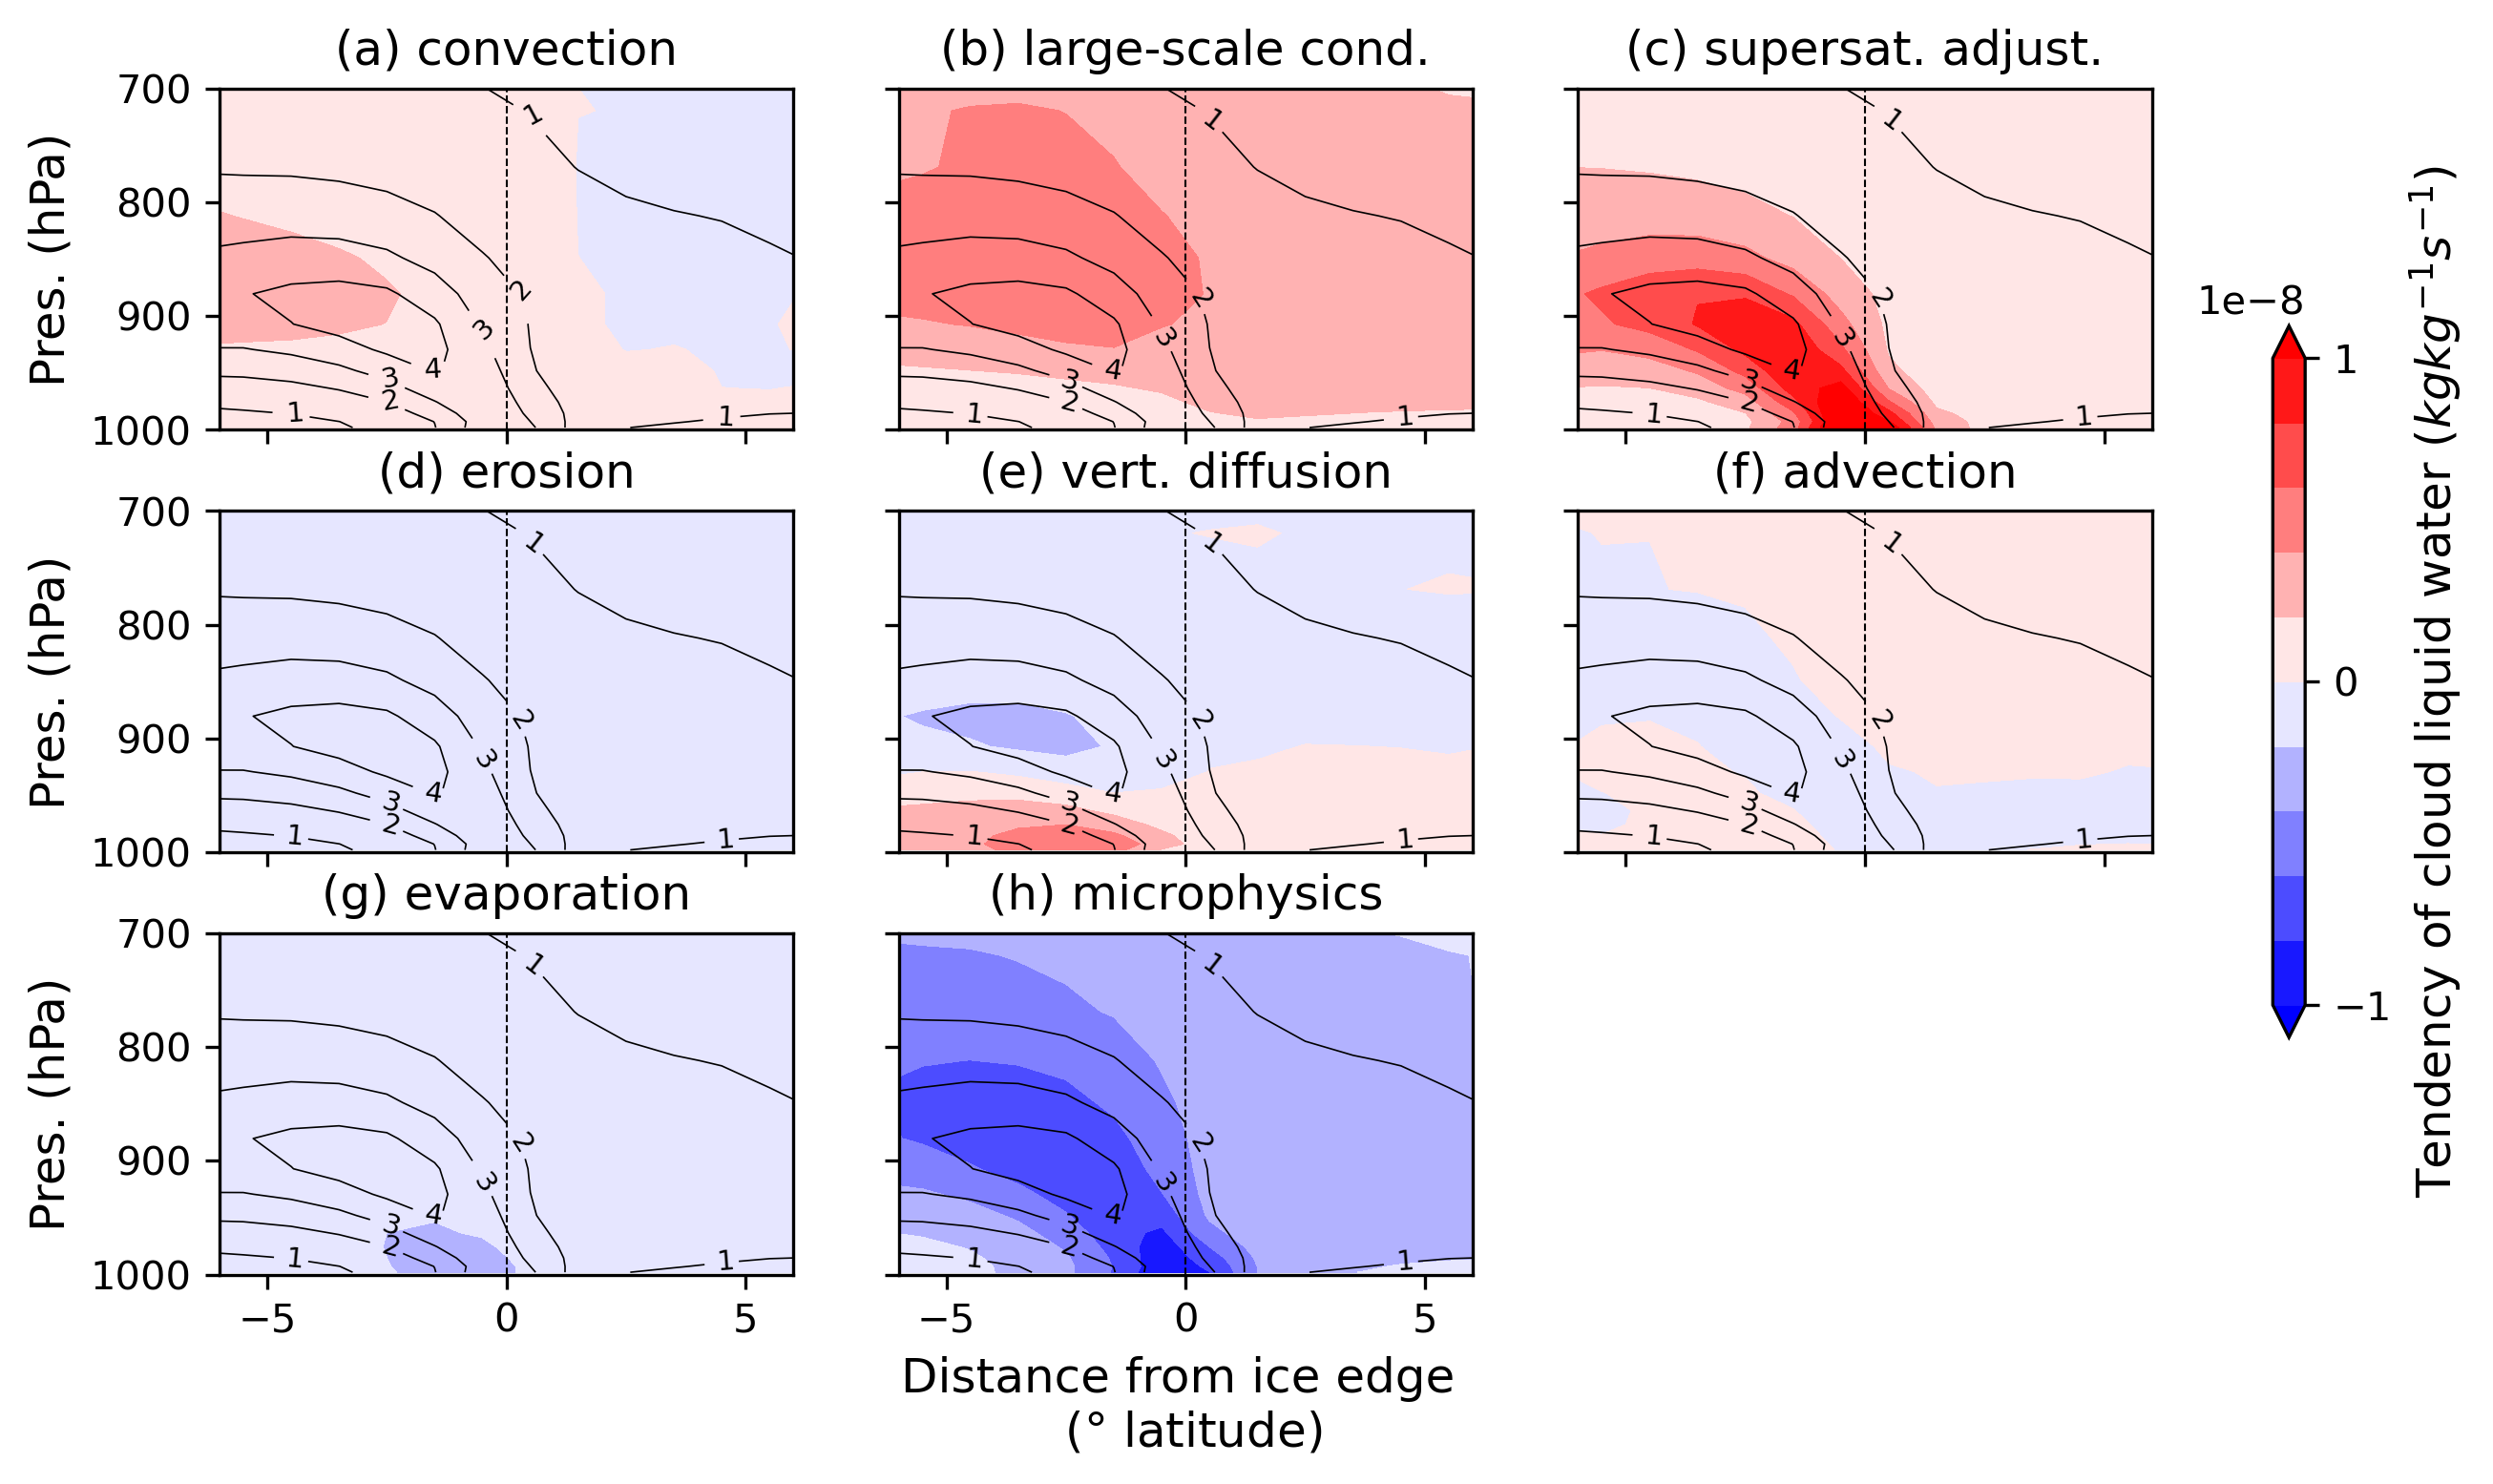

In [3]:
myfontsize = 12
fig, axs = plt.subplots(ncols = 3,
                        nrows = 3,
                        sharex = True, sharey = True,
                        figsize=(23/2.54, 12/2.54), dpi = 300)
axs[-1, -1].axis('off')

plt.tight_layout()

ff0 = f.isel(season = 0)
lim = 10.*(10.**-9)
ncl = 10
mylevels1 = [1., 2., 3., 4.]

#--------------First col-----------------------------------------------------------
x = ff0.distance.values
y = ff0.level.values
y1 = y
cld_amt = (10.**5)*(ff0.liq_wat.values+ff0.ice_wat.values)


#1
var = ff0.qldt_conv
plt2D(fig, axs[0,0], x, y, var, z1 = cld_amt, title = '(a) convection', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = 'Pres. (hPa)', cbar = False, cmap=cm.bwr, levels1 = mylevels1)

#2
var = ff0.qldt_cond 
plt2D(fig, axs[0,1], x, y, var, z1 = cld_amt, title = '(b) large-scale cond.', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = '', cbar = False, cmap=cm.bwr, levels1 = mylevels1)

#3
var = ff0.qldt_liqadj
plt2D(fig, axs[0,2], x, y, var, z1 = cld_amt, title = '(c) supersat. adjust.', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = '', cbar = False, cmap=cm.bwr, levels1 = mylevels1)

#4
var = ff0.qldt_eros
plt2D(fig, axs[1,0], x, y, var, z1 = cld_amt, title = '(d) erosion', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = 'Pres. (hPa)', cbar = False, cmap=cm.bwr, levels1 = mylevels1)

#5
var = ff0.qldt_vdif
oax = plt2D(fig, axs[1,1], x, y, var, z1 = cld_amt, title = '(e) vert. diffusion', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = '', cbar = False, cmap=cm.bwr, levels1 = mylevels1)

#6
var = ff0.qldt_dyn
plt2D(fig, axs[1,2], x, y, var, z1 = cld_amt, title = '(f) advection', levels=np.linspace(-lim, lim, 10 + 1), 
     ylabel = '', cbar = False, cmap=cm.bwr, levels1 = mylevels1)


#7
var = ff0.qldt_evap
plt2D(fig, axs[2,0], x, y, var, z1 = cld_amt, title = '(g) evaporation', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = 'Pres. (hPa)', cbar = False, cmap=cm.bwr, levels1 = mylevels1)

#8
var = ff0.qldt_accr + ff0.qldt_auto + ff0.qldt_berg + ff0.qldt_freez
oax = plt2D(fig, axs[2,1], x, y, var, z1 = cld_amt, title = '(h) microphysics', levels=np.linspace(-lim, lim, ncl + 1), 
      ylabel = '', cbar = False, cmap=cm.bwr, levels1 = mylevels1, xlabel = True)


cbar = fig.colorbar(oax, ax = axs, orientation='vertical', 
                    shrink=0.6, pad = 0.05,ticks = [-lim, 0, lim])
cbar.set_label('Tendency of cloud liquid water ($kgkg^{-1}s^{-1}$)', fontsize=myfontsize)

fig.savefig('Fig11_qldt.png', dpi=fig.dpi, bbox_inches='tight')